In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get training and testing dataset
train = pd.read_csv("D:\Jaidhev\Computer_Science\Sync Interns\Sign Language Classification\sign_mnist_train.csv")
test = pd.read_csv("D:\Jaidhev\Computer_Science\Sync Interns\Sign Language Classification\sign_mnist_test.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
labels = train['label'].values

In [6]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

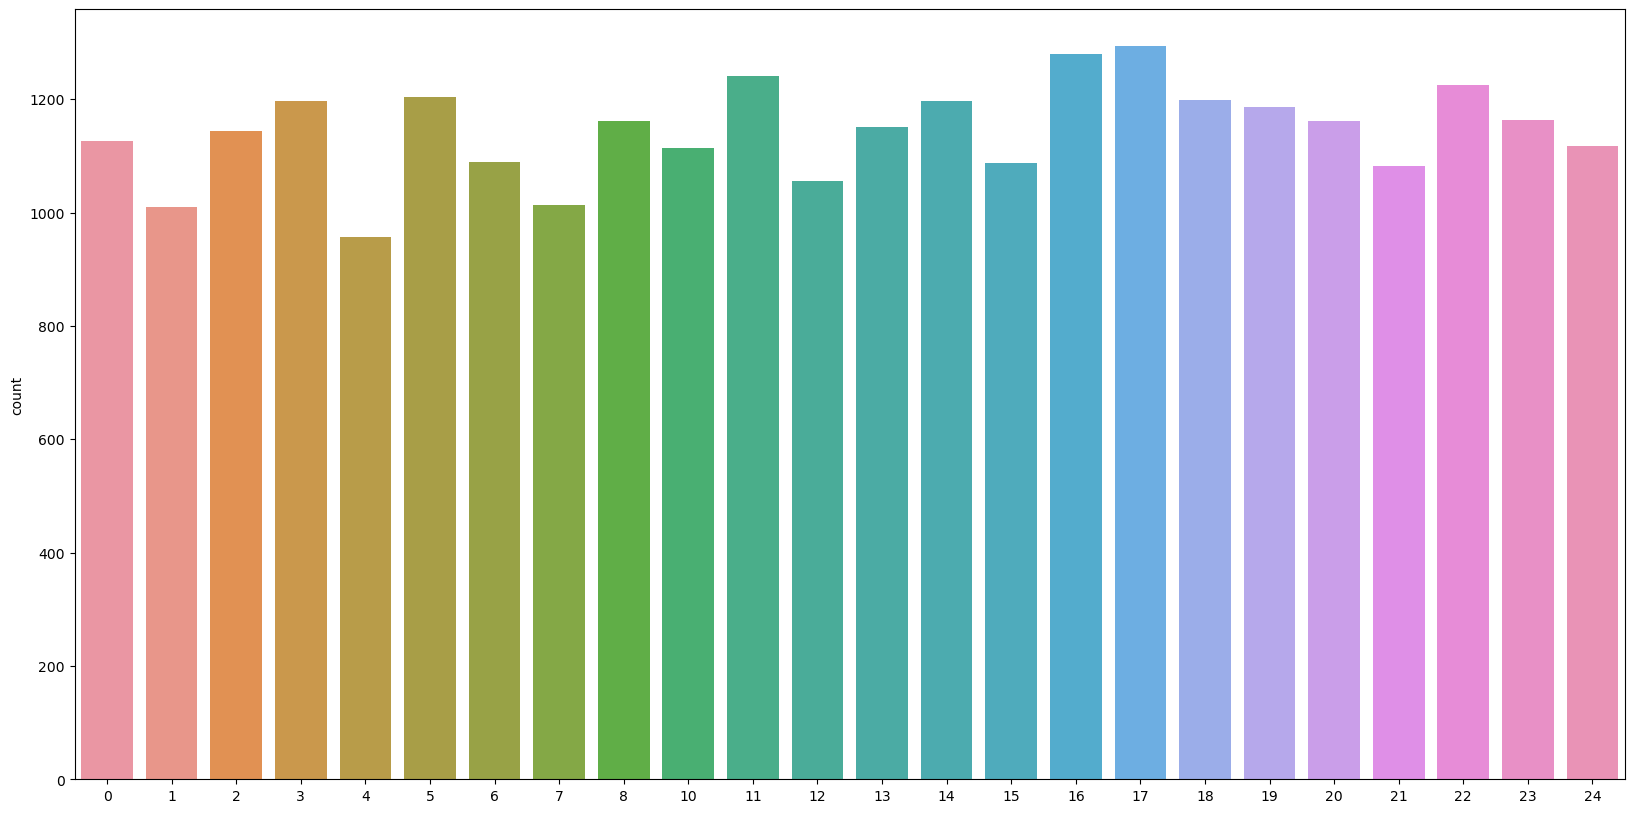

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(x=labels)

In [8]:
train.drop('label', inplace=True, axis=1)
print("Label Dropped")

Label Dropped


In [9]:
images = train.values
images = np.array([np.reshape(i,(28,28)) for i  in images])
images = np.array([i.flatten() for i in images])

In [10]:
images

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [11]:
# Hot encoding
from sklearn.preprocessing import LabelBinarizer
label_Binarizer = LabelBinarizer()

In [12]:
labels = label_Binarizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


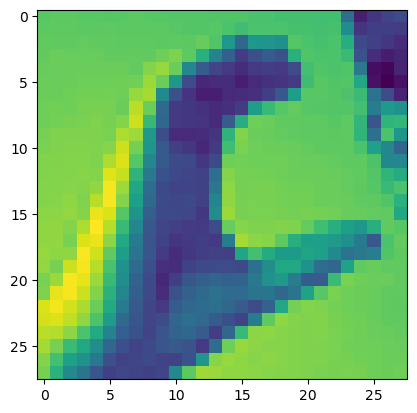

In [13]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [14]:
import cv2
import numpy as np
for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_images = images[rand]
    
    sample = input_images.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Sample Images from the dataset", sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [17]:
x_train = x_train / 255
x_test = x_test / 255

In [18]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [19]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

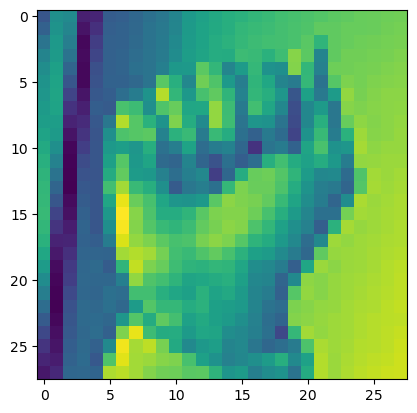

In [20]:
plt.imshow(x_train[0].reshape(28,28))

In [21]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D (64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D (64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D (pool_size = (2, 2)))
model.add(Conv2D (64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D (pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense (128, activation = 'relu'))
model.add(Dropout (0.20))
model.add(Dense (num_classes, activation = 'softmax'))

In [22]:
model.compile(loss = 'categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 25s 148ms/step - loss: 2.5288 - accuracy: 0.2139 - val_loss: 1.4039 - val_accuracy: 0.5755
Epoch 2/10
151/151 [==============================] - 50s 335ms/step - loss: 1.1472 - accuracy: 0.6077 - val_loss: 0.7422 - val_accuracy: 0.7606
Epoch 3/10
151/151 [==============================] - 30s 196ms/step - loss: 0.6992 - accuracy: 0.7645 - val_loss: 0.4652 - val_accuracy: 0.8533
Epoch 4/10
151/151 [==============================] - 17s 114ms/step - loss: 0.4635 - accuracy: 0.8436 - val_loss: 0.3236 - val_accuracy: 0.9001
Epoch 5/10
151/151 [==============================] - 17s 112ms/step - loss: 0.3219 - accuracy: 0.8933 - val_loss: 0.2083 - val_accuracy: 0.9349
Epoch 6/10
151/151 [==============================] - 17s 114ms/step - loss: 0.2236 - accuracy: 0.9285 - val_loss: 0.1360 - val_accuracy: 0.9644
Epoch 7/10
151/151 [==============================] - 18s 117ms/step - loss: 0.1779 - accuracy: 0.9446 - val_loss: 0.0939 - val_ac

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [25]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("SAVED")

SAVED


C:\Users\jayak\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


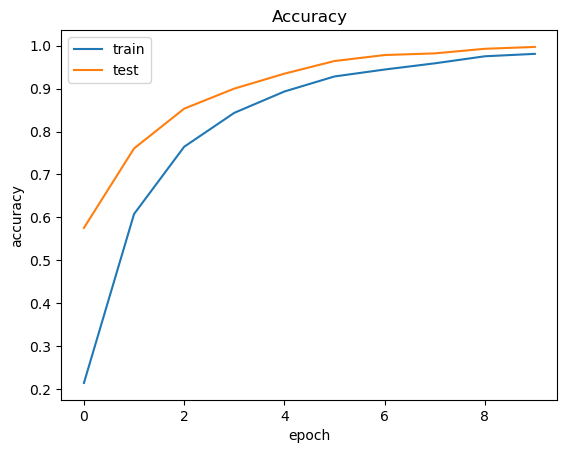

In [27]:
# View our training history graphically plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend([ 'train', 'test'])
plt.show()

In [28]:
# Reshape our test data so that we can evaluate it's performance on unseen data 
test_labels = test['label']
test.drop('label', axis= 1, inplace = True) 

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_Binarizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

225/225 [==============================] - 3s 12ms/step


In [29]:
from sklearn.metrics import accuracy_score
    
accuracy_score(test_labels, y_pred.round())

0.8335192414947016

In [85]:
def getLetter(result):
    classLabels = {
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
        5: 'F',
        6: 'G',
        7: 'H',
        8: 'I',
        9: 'K',
        10: 'L',
        11: 'M',
        12: 'N',
        13: '0',
        14: 'P',
        15: 'Q',
        16: 'R',
        17: 'S',
        18: 'T',
        19: 'U',
        20: 'V',
        21: 'W',
        22: 'X',
        23: 'Y'}
    
    try:
        res = int(result)
        return classLabels[res]  
    except:
        return "Output"
    